In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Amazon - Movies and TV Ratings.csv")

In [3]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(4848, 207)

In [5]:
print('There are {} unique users'.format(df['user_id'].nunique()))

There are 4848 unique users


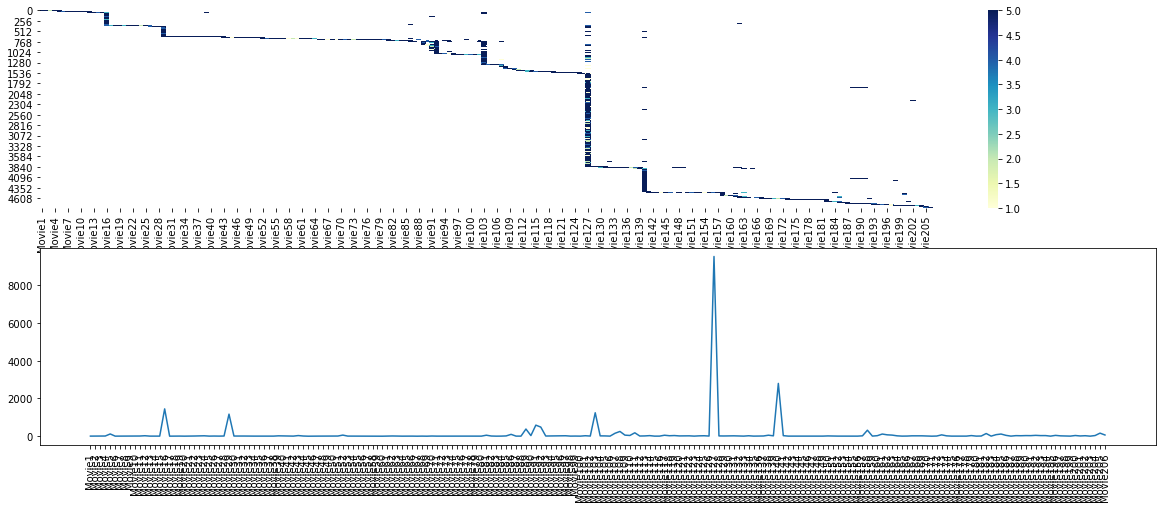

In [6]:
# two plot figure
fig,axs= plt.subplots(2,figsize=(20,8))
# heatmap for movie wise ratings
sns.heatmap(df.drop('user_id',axis=1),cmap="YlGnBu",ax=axs[0])
# sum of ratings per movie
axs[1].plot(df.drop('user_id',axis=1).sum())
plt.xticks(rotation=90)
plt.show()

### Top 5 movies by rating count

In [7]:
df.describe().T['count'].sort_values(ascending=False)[0:6]

Movie127    2313.0
Movie140     578.0
Movie16      320.0
Movie103     272.0
Movie29      243.0
Movie91      128.0
Name: count, dtype: float64

Text(0.5, 1.0, 'Top 5 movies by no. of ratings')

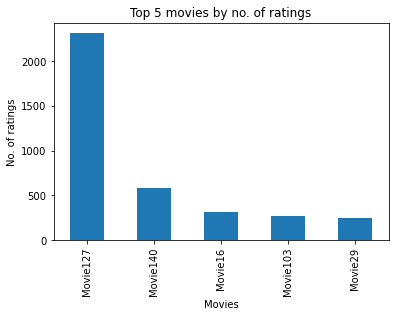

In [8]:
df.describe().T['count'].sort_values(ascending=False)[0:5].plot.bar()
plt.xlabel('Movies')
plt.ylabel('No. of ratings')
plt.title('Top 5 movies by no. of ratings')

### Average rating per movie

In [9]:
amzn=df.drop('user_id',axis=1)
amzn_max_views=amzn.sum()
amzn_max_views

Movie1        5.0
Movie2        5.0
Movie3        2.0
Movie4       10.0
Movie5      119.0
            ...  
Movie202     26.0
Movie203      3.0
Movie204     35.0
Movie205    162.0
Movie206     64.0
Length: 206, dtype: float64

In [10]:
# Average rating per movie
amzn_max_views.mean()

106.44660194174757

### Movie with Maximum / Minimum audiences

In [11]:
max(amzn_max_views)

9511.0

In [12]:

amzn_max_views.argmax()

126

In [13]:
# Movie 127 has the maximum number of audiences
amzn_max_views['Movie127']

9511.0

Text(0.5, 1.0, 'Movies with least audiences by ratings')

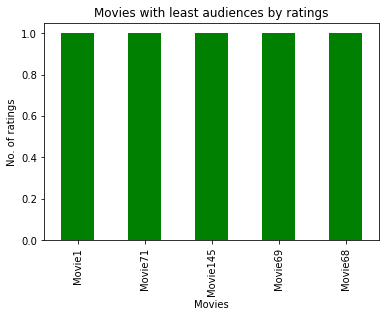

In [14]:
df.describe().T['count'].sort_values(ascending=True)[0:5].plot.bar(color='g')
plt.xlabel('Movies')
plt.ylabel('No. of ratings')
plt.title('Movies with least audiences by ratings')

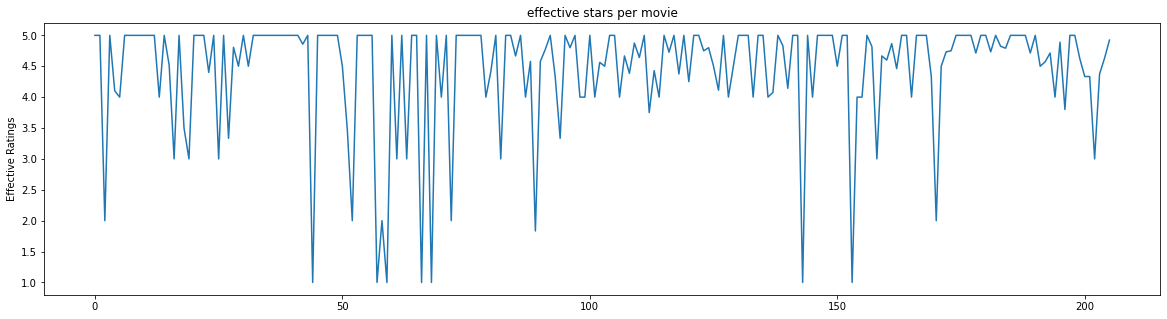

In [15]:
arr=[]
pep_cnt=[]
for col in df.drop('user_id',axis=1).columns:
    arr.append(df[col].sum()/(4848-df[col].isnull().sum()))
    pep_cnt.append((4848-df[col].isnull().sum()))
plt.figure(figsize=(20,5))
plt.title('effective stars per movie')
plt.ylabel('Effective Ratings')
plt.plot(arr)
plt.show()


### Feature Extraction

In [16]:
df1= pd.DataFrame({'Movie_name':np.arange(1,207,1),'Avg_score':arr,'Votes':pep_cnt})
df1.head()

,Movie_name,Avg_score,Votes
0,1,5.000000,1
1,2,5.000000,1
2,3,2.000000,1
3,4,5.000000,2
4,5,4.103448,29


In [17]:
df1.sort_values(['Avg_score','Votes'],ascending=False)

,Movie_name,Avg_score,Votes
185,186,5.0,9
187,188,5.0,6
190,191,5.0,6
11,12,5.0,5
100,101,5.0,5
...,...,...,...
59,60,1.0,1
66,67,1.0,1
68,69,1.0,1
143,144,1.0,1


In [18]:
## Lets consider movies for model which have atleast 4 votes
X=df1[df1['Votes']>4]
best_movie_by_votes=[]
for i in X['Movie_name']:
    best_movie_by_votes.append(i)
np.asarray(best_movie_by_votes)  

array([  5,  12,  16,  24,  29,  43,  52,  81,  86,  89,  90,  91,  92,
        95,  97, 101, 103, 107, 108, 109, 110, 111, 114, 117, 118, 119,
       125, 127, 134, 138, 140, 141, 158, 160, 161, 162, 163, 173, 179,
       182, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 196, 197,
       200, 202, 204, 205, 206])

In [19]:
## Now lets take movies based on the average score
x=df1[df1['Avg_score']>4]
best_movie_by_score=[]
for i in x['Movie_name']:
    best_movie_by_score.append(i)
np.asarray(best_movie_by_score)  

array([  1,   2,   4,   5,   7,   8,   9,  10,  11,  12,  13,  15,  16,
        18,  21,  22,  23,  24,  25,  27,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  46,  47,  48,
        49,  50,  51,  54,  55,  56,  57,  61,  63,  65,  66,  68,  70,
        72,  74,  75,  76,  77,  78,  79,  81,  82,  84,  85,  86,  87,
        89,  91,  92,  93,  94,  96,  97,  98, 101, 103, 104, 105, 106,
       108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 135, 136, 138,
       139, 140, 141, 142, 143, 145, 147, 148, 149, 150, 151, 152, 153,
       157, 158, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 198, 199, 200,
       201, 202, 204, 205, 206])

In [20]:
# Best movies by votes
df1.sort_values(['Votes','Avg_score'],ascending=False)

,Movie_name,Avg_score,Votes
126,127,4.111976,2313
139,140,4.833910,578
15,16,4.518750,320
102,103,4.562500,272
28,29,4.806584,243
...,...,...,...
59,60,1.000000,1
66,67,1.000000,1
68,69,1.000000,1
143,144,1.000000,1


Text(0, 0.5, 'Votes')

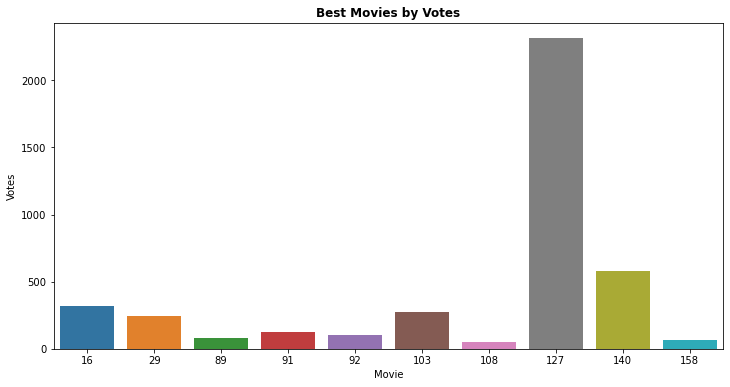

In [21]:
# Visualization of the data
pop=df1.sort_values(['Votes'],ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=pop['Movie_name'].head(10), y=pop['Votes'].head(10), data=pop)
plt.title("Best Movies by Votes",weight='bold')
plt.xlabel("Movie")
plt.ylabel("Votes")

## Weighted Average Method

In [23]:
v=df1['Votes']
R= df1['Avg_score']
C= df1['Avg_score'].mean()
M= df1['Votes'].quantile(0.70)

In [24]:
df1['Weighted_avg_ratings']=((R*v)+ (C*M))/(v+M)

In [25]:
df1_sorted= df1.sort_values('Weighted_avg_ratings',ascending=False)
df1_sorted= df1_sorted.reset_index()

Text(0, 0.5, 'Weighted_average')

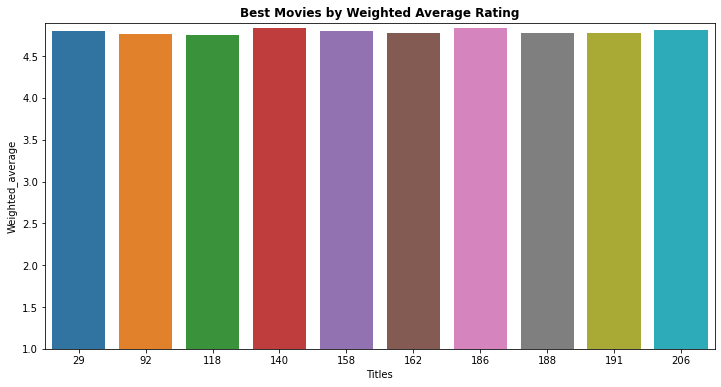

In [26]:
weight_avg=df1_sorted.sort_values('Weighted_avg_ratings',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_avg['Movie_name'].head(10), y=weight_avg['Weighted_avg_ratings'].head(10), data=weight_avg)
plt.ylim(1,4.9)
plt.title("Best Movies by Weighted Average Rating",weight='bold')
plt.xlabel("Titles")
plt.ylabel("Weighted_average")

## KNN Method

In [27]:
df1.head()
data= df1.copy()

In [28]:
df=df.fillna(0)

In [29]:
df1.head()

,Movie_name,Avg_score,Votes,Weighted_avg_ratings
0,1,5.000000,1,4.558749
1,2,5.000000,1,4.558749
2,3,2.000000,1,3.958749
3,4,5.000000,2,4.632291
4,5,4.103448,29,4.145265


In [30]:
melt_df=df.melt(id_vars= df.columns[0],value_vars=df.columns[1:],var_name='Movie',value_name='rating')
melt_df.shape

(998688, 3)

In [31]:
melt_df.head()

,user_id,Movie,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0


In [32]:
movie_feature_df=melt_df.pivot_table(index='Movie',columns='user_id',values='rating').fillna(0)
movie_feature_df.head()

user_id,A0047322388NOTO4N8SKD,A00473363TJ8YSZ3YAGG9,A1004AX2J2HXGL,A100CQXJ6D44T9,A100Z2S0880G9A,A1027BL79BSP5P,A102Z4PIK7CYD8,A10367AR7BPFG2,A103HNKB9YAN6P,A103KNDW8GN92L,...,AZNADO488RR7H,AZPCHLL1GHUXU,AZQLDLVVX9PE,AZR2EXV14JPHN,AZSL7FA9NWYX0,AZT7WWYF4YVJA,AZVER2EPLYDZ9,AZY4RYP9948K9,AZYJ9TS07B02W,AZZ1KF8RAO1BR
Movie,,,,,,,,,,,,,,,,,,,,,
Movie1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from scipy.sparse import csr_matrix

movie_ratings_df_matrix = csr_matrix(movie_feature_df.values)

from sklearn.neighbors import NearestNeighbors

In [34]:
knn= NearestNeighbors(metric='cosine',algorithm='brute')
knn.fit(movie_ratings_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [35]:
# Lets pick a movie at random using randomchoice function with shape[0] which picks one movie
query_index=np.random.choice(movie_feature_df.shape[0])
print(query_index)
distances,indices=knn.kneighbors(movie_feature_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)

32


In [36]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommendations for {}:\n'.format(movie_feature_df.index[query_index]))
    else:
        print('{0}:{1} with distances of {2}:'.format(i,movie_feature_df.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Movie128:

1:Movie37 with distances of 1.0:
2:Movie39 with distances of 1.0:
3:Movie38 with distances of 1.0:
4:Movie35 with distances of 1.0:
